In [1]:
import os
import pathlib
import yaml
import numpy
import pandas
import xarray
import h5netcdf
from datetime import datetime
from glob import glob
import time
from matplotlib import pyplot as plt, cm, colors, ticker
#import cartopy.cls
import matplotlib as mpl
mpl.rc('font', size=12)
mpl.rc('xtick', labelsize=12)
mpl.rc('ytick', labelsize=12)
mpl.rc('legend', fontsize=12)
mpl.rc('axes', titlesize=16)
mpl.rc('axes', labelsize=12)
mpl.rc('figure', titlesize=16)
mpl.rc('text', usetex=False)
mpl.rc('font', family='sans-serif', weight='normal', style='normal')

In [2]:
sfc = xarray.open_dataset('/scratch/rmueller/MIDOSS/Results/testDec03/surface_bunker_0-500.nc')
[*sfc]

['SurfaceConcentration_SumSum',
 'SurfaceConcentration_SumSum_ln',
 'SurfacePresence',
 'SurfacePresence_24h',
 'SurfacePresence_24h_to_72h',
 'SurfacePresence_72h_to_168h',
 'SurfaceVolume_MaxSum',
 'SurfaceVolume_MaxSum_ln',
 'SurfaceVolume_SumSum',
 'SurfaceVolume_SumSum_24h',
 'SurfaceVolume_SumSum_24h_ln',
 'SurfaceVolume_SumSum_24h_to_72h',
 'SurfaceVolume_SumSum_24h_to_72h_ln',
 'SurfaceVolume_SumSum_72h_to_168h',
 'SurfaceVolume_SumSum_72h_to_168h_ln',
 'SurfaceVolume_SumSum_ln']

In [3]:
mohid_out = xarray.open_dataset('/scratch/rmueller/MIDOSS/Results/testDec03/mohid_bunker_0-500.nc')

In [4]:
[*mohid_out]

['BeachPresence',
 'BeachPresence_24h',
 'BeachPresence_24h_to_72h',
 'BeachPresence_72h_to_168h',
 'BeachTime',
 'BeachVolume',
 'SurfaceConcentrationSum',
 'SurfacePresence',
 'SurfacePresence_24h',
 'SurfacePresence_24h_to_72h',
 'SurfacePresence_72h_to_168h',
 'SurfaceVolumeMax',
 'SurfaceVolumeSum',
 'SurfaceVolumeSum_24h',
 'SurfaceVolumeSum_24h_to_72h',
 'SurfaceVolumeSum_72h_to_168h']

In [5]:
print(mohid_out.SurfaceVolumeSum.min(), mohid_out.SurfaceVolumeSum.max())

<xarray.DataArray 'SurfaceVolumeSum' ()>
array(0.) <xarray.DataArray 'SurfaceVolumeSum' ()>
array(9795.4453)


In [6]:
mohid_out.SurfaceVolumeSum.shape

(500, 896, 396)

## Calculate actual median for comparison (not yet working)

#### Create presence map to use to identify grid locations for calculating median

In [7]:
presence3d = numpy.asarray(mohid_out.SurfacePresence)
presence3d.shape

(500, 896, 396)

In [8]:
presence=numpy.sum(presence3d,axis=0)
maxsum = numpy.max(mohid_out.SurfaceVolumeSum,axis=0)

#### Set zero to NaN so median is only across runs where oil is present
This requires a lot of memory, so I have it commented out for now

In [9]:
# # to compare with straight up mean and median values across all runs 
# sfcVol3d = numpy.zeros((500, 896, 396),dtype=float)
# for idx in numpy.arange(500):
#     SfcVol2d = mohid_out.SurfaceVolumeSum[idx,:,:]
#     SfcVol2d = SfcVol2d.where(SfcVol2d<3e-3,numpy.nan)
#     sfcVol3d[idx,:,:]=SfcVol2d

In [10]:
# SfcVol_median = numpy.nanmedian(sfcVol3d, axis=0)
# SfcVol_max = numpy.max(mohid_out.SurfaceVolumeSum)
# numpy.nanmedian(SfcVol_median)

## Develop method to create a histogram at each location where presence == True 

In [11]:
imax,jmax = numpy.where(presence==presence.max())
print(imax,jmax)

[321 326] [284 293]


In [12]:
# This requires a lot of memory and time.  Commenting for now. 
# # create an array to store histogram values
# [nt,ny,nx] = mohid_out.SurfaceVolumeSum.shape
# #bins = numpy.arange(3e-3,3000,100)
# bins = [3e-3, 100, 200, 300, 400, 500, 1000,1500,2000,3000,4000,5000,10000]
# # histogram count for each spill
# n = numpy.zeros((ny,nx,len(bins)-1),dtype=float)
# # sum of count over all spills
# n_all = numpy.zeros((ny,nx,len(bins)-1),dtype=float)

# ## Plot each histogram where presence > 0 
# fig, axs = plt.subplots(1, 1, figsize=(8, 4), gridspec_kw={'wspace': 0.25, 'hspace': 0.1})
# ii,jj = numpy.where(presence==presence.max())#numpy.where(presence)
# for idx in numpy.arange(len(ii)):
#     n[ii[idx],jj[idx],:],bins,patches=mohid_out.SurfaceVolumeSum[:,ii[idx],jj[idx]].plot.hist(ax=axs,log=True, bins=bins,alpha=0.5, color='green')
#     n_all += n[ii[idx],jj[idx],:]
# axs.set_title('individual spills')
# axs.set_ylim(7e-1, 5e5)

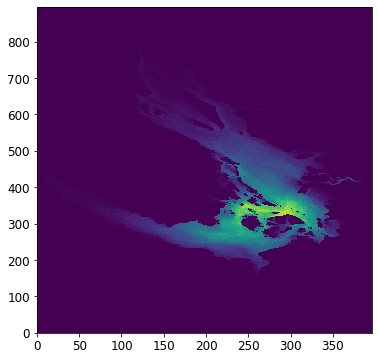

In [13]:
fig, axs = plt.subplots(1, 1, figsize=(6, 6), 
    gridspec_kw={'wspace': 0.25, 'hspace': 0.1})
axs = plt.pcolormesh(presence)
# fig, axs = plt.subplots(1, 1, figsize=(6, 6), 
#     gridspec_kw={'wspace': 0.25, 'hspace': 0.1})
# axs = plt.pcolormesh(maxsum,log=True)

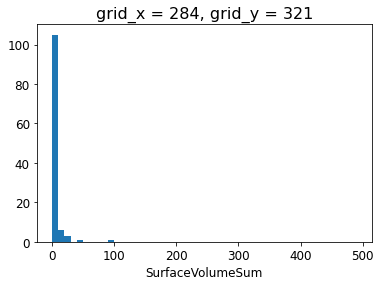

In [14]:
bins = numpy.arange(3e-3,500,10)
axs=mohid_out.SurfaceVolumeSum.isel(grid_y=321,grid_x=284).plot.hist(bins=bins)
#for idx in numpy.arange(len(ii)):

In [15]:
# example from Elise (via Karyn)
# micZ1905=hc1905.microzooplankton.sel(time=slice(start,end)).isel(depth=ik,gridY=ij,gridX=ii)
# diat1905=hc1905.diatoms.sel(time=slice(start,end)).isel(depth=ik,gridY=ij,gridX=ii)

### load runlist used to create aggregated files 

In [16]:
yaml_file=pathlib.Path(
     '/scratch/rmueller/MIDOSS/Results',
     'MOHID_results_locations_27112021_12:05:17.yaml')
with yaml_file.open("rt") as f:
    run_paths = yaml.safe_load(f) 

### Get spill volumes and sort spills to get 5 largest spills by oil type

In [17]:
First100 = {}
for oil in ['diesel','bunker']:
    First100[oil] = run_paths[oil][0:100]

In [18]:
big5_spills={}
for oil in ['diesel','bunker']:
    volume = {}
    volume[oil]={}
    volume[oil]['volume']=[]
    for idx,ncfile in enumerate(First100[oil]):
        directory = "/".join(ncfile.split("/")[:-1]) 
        oil_tag = First100[oil][idx].split('_')[-3]
        # Open the Lagrangian file used for spill
        Lagrangian_file = directory+'/Lagrangian_'+oil_tag+'.dat'
        with open(Lagrangian_file, 'r') as f:
            for line in f:
                if 'POINT_VOLUME              :' in line: 
                    # select spill volume quantity after ':'
                    spillvolume = line.split(':')[-1].split('\n')[0]
                    # convert to float for "sort_values" to work properly
                    volume[oil]['volume'].append(float(spillvolume)) 
        big5_spills[oil] = pandas.DataFrame.from_dict(
            volume[oil]).sort_values('volume',ascending=False)[0:5]

In [19]:
big5_spills

{'diesel':          volume
 30  4953.009484
 12   649.588420
 93   296.522276
 67   210.232635
 72   202.045269,
 'bunker':          volume
 77  3803.779393
 76  2256.047464
 81  1955.231907
 6   1490.015153
 45   683.092967}

In [20]:
%%time
## Generate "TopSpills_df.csv"
## This section takes 10 minutes on 5210 Mb
#vars2plot= ['Dissolution_3D','OilConcentration_3D','OilWaterColumnOilVol_3D']
vars2plot= ['OilWaterColumnOilVol_3D']
vol3d={}
oilArrTime={}
for oil in ['diesel','bunker']:
    vol3d[oil]={}
    oilArrTime[oil]={}
    # loop through indices of the 5 largest spills in the first 100 spill files
    index = 0
    for idx in big5_spills[oil].index.values:
        spill_xr=xarray.open_dataset(First100[oil][idx])
        vol3d[oil][index]=spill_xr['OilWaterColumnOilVol_3D'][:,39,:,:]
        oilArrTime[oil][index]=spill_xr['Oil_Arrival_Time']
        spill_xr.close()
        index+=1

CPU times: user 1.33 s, sys: 60.8 ms, total: 1.39 s
Wall time: 1.43 s


### Plot up surface volume of first 5 spills

In [21]:
vol3d[oil][0].attrs

{'standard_name': 'OilWaterColumnOilVol_3D',
 'long_name': 'OilWaterColumnOilVol_3D',
 'units': 'm3/gridcell'}

### Graphic specifications

In [22]:
surface_threshold = 3e-3
bins = numpy.arange(surface_threshold,1500,50)

### Plot Histogram of 3d volume

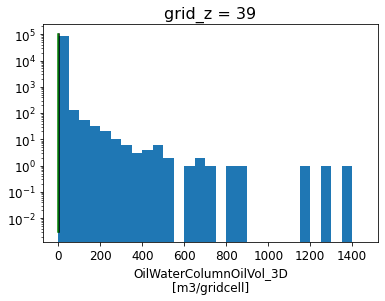

In [23]:
mean_val = vol3d[oil][0].where(vol3d[oil][0]>surface_threshold).mean().values.item()
median_val = vol3d[oil][0].where(vol3d[oil][0]>surface_threshold).median().values.item()
axs=vol3d[oil][0].where(vol3d[oil][0]>surface_threshold).plot.hist(bins=bins,log=True)
plt.plot([mean_val, mean_val], [3e-3,1e5], color="black")
plt.plot([median_val, median_val], [3e-3,1e5], color="green")

In [24]:
median_val

0.36100000000000004

In [25]:
mean_val

1.6529645730259497

### Plot histogram of 3d volume integrated over time

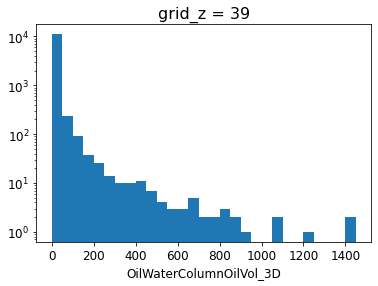

In [26]:
axs = vol3d[oil][0].where(vol3d[oil][0]>surface_threshold).sum(
    dim='time', skipna=True).plot.hist(bins=bins,log=True)

### Plot historgram of log-transformed 3d volume, integrated over time

In [27]:
# first log-transpose then sum over time
vol3d_ln=numpy.log(
    vol3d[oil][0].where(vol3d[oil][0]>surface_threshold)
).sum(dim='time',skipna=True)
# first sum over time and then log-transpose
vol3d_sumt=vol3d[oil][0].where(vol3d[oil][0]>surface_threshold).sum(dim='time',skipna=True)
vol3d_sumt_ln=numpy.log(
    vol3d_sumt.where(vol3d_sumt>0)
)

In [28]:
numpy.exp(vol3d_ln).max().values.item()

1.722525208178137e+16

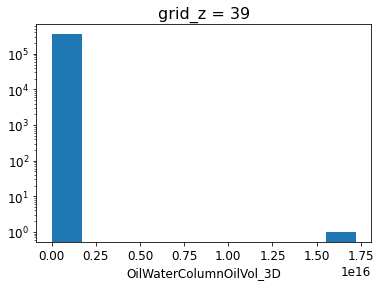

In [29]:
axs = numpy.exp(vol3d_ln).plot.hist(log=True)

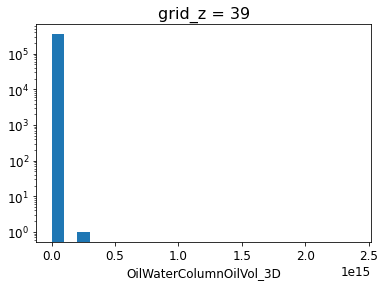

In [30]:
bins_ln = numpy.arange(surface_threshold,2.5e15,0.1e15)
axs = numpy.exp(vol3d_ln).plot.hist(bins=bins_ln,log=True)

### Plot historgram of 3D integrated volume, log-transformed 
- Note: In this case this graphic represents exp(ln(X)) and ought to be the same as [11]

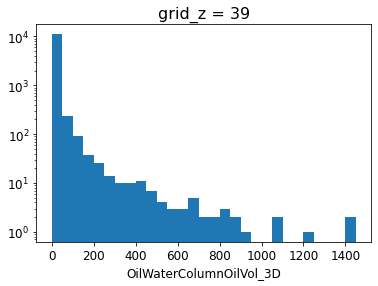

In [31]:
axs = numpy.exp(vol3d_sumt_ln).plot.hist(bins=bins,log=True)

In [32]:
numpy.exp(vol3d_sumt_ln).min().values.item()

0.358

In [33]:
vol3d_sumt.where(vol3d_sumt>0).min().values.item()

0.35800000000000004

## Validate time aggregation method

In [34]:
sfc_vol_threshold = 3e-3
nruns=len(vol3d[oil])
#dims=nruns
[nt,ny,nx]=vol3d[oil][0].shape

dims=('nspills','grid_y','grid_x')
MOHID_In=xarray.Dataset(
    data_vars=dict(
        SurfacePresence=(dims, numpy.zeros((nruns,ny,nx),dtype=int)),
        SurfacePresence_24h=(dims, numpy.zeros((nruns,ny,nx),dtype=int)),
        SurfacePresence_24h_to_72h=(dims, numpy.zeros((nruns,ny,nx),dtype=int)),
        SurfacePresence_72h_to_168h=(dims, numpy.zeros((nruns,ny,nx),dtype=int)),
        SurfaceVolumeSum=(dims, numpy.zeros((nruns,ny,nx),dtype=float)),
        SurfaceVolumeMax=(dims, numpy.zeros((nruns,ny,nx),dtype=float)),
        SurfaceVolumeSum_24h=(dims, numpy.zeros((nruns,ny,nx),dtype=float)),
        SurfaceVolumeSum_24h_to_72h=(dims, numpy.zeros((nruns,ny,nx),dtype=float)),
        SurfaceVolumeSum_72h_to_168h=(dims, numpy.zeros((nruns,ny,nx),dtype=float)),
        SurfaceConcentrationSum=(dims, numpy.zeros((nruns,ny,nx),dtype=float))
    ),
    coords=dict(
        grid_y=range(ny),
        grid_x=range(nx))
)


In [35]:
oil

'bunker'

In [36]:
for idx in vol3d[oil]:
    spill_start = vol3d[oil][idx].time[0] 
    spill_end = vol3d[oil][idx].time[-1]
    # define time thresholds
    one_day=numpy.timedelta64(24,'h')
    three_days=numpy.timedelta64(48,'h')
    seven_days=numpy.timedelta64(168,'h')
    # Select surface volume, concentration and dissolution
    vol3d_orig=vol3d[oil][idx]
    # Sum volume over time where volume is greater than threshold
    vol3d_sumt = vol3d_orig.where(vol3d_orig>sfc_vol_threshold).sum(
            dim="time",skipna=True)
    # 3d volume above threshold limits
    vol3dthresh = vol3d_orig.where(vol3d_orig>sfc_vol_threshold)
    #~~~ Without log transforme ~~~ 
    MOHID_In.SurfacePresence[idx,:,:]=(
        vol3d_orig.max(dim='time',skipna=True)>sfc_vol_threshold
    ).astype(int)
    MOHID_In.SurfaceVolumeSum[idx,:,:]=vol3d_sumt
    MOHID_In.SurfaceVolumeSum_24h[idx,:,:]=vol3dthresh.loc[
        dict(time=slice(spill_start,spill_start+one_day))
        ].sum(dim="time",skipna=True)
    MOHID_In.SurfaceVolumeSum_24h_to_72h[idx,:,:]=vol3dthresh.loc[
        dict(time=slice(
            spill_start+one_day,spill_start+three_days))
        ].sum(dim="time",skipna=True)
    MOHID_In.SurfaceVolumeSum_72h_to_168h[idx,:,:]=vol3dthresh.loc[
        dict(time=slice(
            spill_start+three_days,spill_start+seven_days))
        ].sum(dim="time",skipna=True)
    

In [37]:
spill_start

<xarray.DataArray 'time' ()>
array('2017-03-03T00:30:00.000000000', dtype='datetime64[ns]')
Coordinates:
    time     datetime64[ns] 2017-03-03T00:30:00
    grid_z   int16 39
Attributes:
    standard_name:  time
    long_name:      time
    tz_name:        UTC

In [38]:
spill_start + one_day

<xarray.DataArray 'time' ()>
array('2017-03-04T00:30:00.000000000', dtype='datetime64[ns]')
Coordinates:
    time     datetime64[ns] 2017-03-03T00:30:00
    grid_z   int16 39

In [39]:
vol3d[oil][idx].time[0].values + one_day

numpy.datetime64('2017-03-04T00:30:00.000000000')

In [40]:
spill_start.values + seven_days

numpy.datetime64('2017-03-10T00:30:00.000000000')

In [41]:
spill_end.values

numpy.datetime64('2017-03-09T23:30:00.000000000')

### straight sum

In [42]:
SurfaceOut = {}
SurfaceOut['SurfacePresence']=MOHID_In.SurfacePresence.sum(dim='nspills') 
SurfaceOut['SurfaceVolume_SumSum']=MOHID_In.SurfaceVolumeSum.sum(
    dim='nspills', skipna=True)    
SurfaceOut['SurfaceVolume_SumSum_24h']=MOHID_In.SurfaceVolumeSum_24h.sum(
    dim='nspills', skipna=True)
SurfaceOut['SurfaceVolume_SumSum_24h_to_72h']=MOHID_In.SurfaceVolumeSum_24h_to_72h.sum(
    dim='nspills', skipna=True)
SurfaceOut['SurfaceVolume_SumSum_72h_to_168h']=MOHID_In.SurfaceVolumeSum_72h_to_168h.sum(
    dim='nspills', skipna=True)
SurfaceOut['SurfaceVolume_MaxSum']=MOHID_In.SurfaceVolumeMax.sum(
    dim='nspills', skipna=True)

### log transpose first then sum 

In [43]:
SurfaceOut['SurfaceVolume_SumSum_ln']=numpy.log(
   MOHID_In.SurfaceVolumeSum.where(MOHID_In.SurfaceVolumeSum>0)
).sum(dim='nspills', skipna=True)
SurfaceOut['SurfaceVolume_SumSum_24h_ln']=numpy.log(
   MOHID_In.SurfaceVolumeSum_24h.where(MOHID_In.SurfaceVolumeSum_24h>0)
).sum(dim='nspills', skipna=True)
SurfaceOut['SurfaceVolume_SumSum_24h_to_72h_ln']=numpy.log(
   MOHID_In.SurfaceVolumeSum_24h_to_72h.where(
       MOHID_In.SurfaceVolumeSum_24h_to_72h>0)
).sum(dim='nspills', skipna=True)
SurfaceOut['SurfaceVolume_SumSum_72h_to_168h_ln']=numpy.log(
   MOHID_In.SurfaceVolumeSum_72h_to_168h.where(
       MOHID_In.SurfaceVolumeSum_72h_to_168h>0)
).sum(dim='nspills', skipna=True)
SurfaceOut['SurfaceVolume_MaxSum_ln']=numpy.log(
    MOHID_In.SurfaceVolumeMax.where(
    MOHID_In.SurfaceVolumeMax>0)).sum(dim='nspills', skipna=True)

## Plot 5 largest bunker spills
- histogram of surface volume of all 5 spills
- histogram of straight sum of surface volume
- histogram of geometric sum (for lack of a better term)

(0.7, 500000.0)

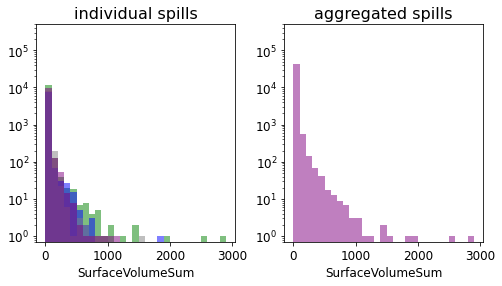

In [44]:
bins = numpy.arange(surface_threshold,3000,100)
color=['green','blue','grey','purple']
fig, axs = plt.subplots(1, 2, figsize=(8, 4), 
                        gridspec_kw={'wspace': 0.25, 'hspace': 0.1})
for idx in numpy.arange(0,4):
    MOHID_In.SurfaceVolumeSum[idx,:,:].plot.hist(ax=axs[0],log=True, bins=bins,alpha=0.5, color=color[idx])
MOHID_In.SurfaceVolumeSum.plot.hist(ax=axs[1],log=True, bins=bins,alpha=0.5, color=color[idx])
axs[0].set_title('individual spills')
axs[0].set_ylim(7e-1, 5e5)
axs[1].set_title('aggregated spills')
axs[1].set_ylim(7e-1, 5e5)

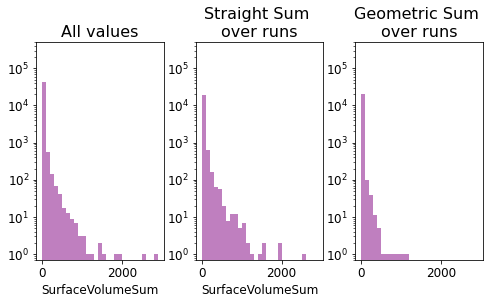

In [45]:
# SurfaceOut['SurfaceLogMean']= numpy.where(
#     SurfaceOut['SurfaceVolume_SumSum_ln']>0,
#     SurfaceOut['SurfaceVolume_SumSum_ln']/SurfaceOut['SurfacePresence'],
#     numpy.nan)
SurfaceOut['SurfaceLogMean']= SurfaceOut['SurfaceVolume_SumSum_ln']/SurfaceOut['SurfacePresence']
SurfaceOut['SurfaceLogSum'] = numpy.exp(SurfaceOut['SurfaceLogMean'])*SurfaceOut['SurfacePresence']
%matplotlib inline    
fig, axs = plt.subplots(1, 3, figsize=(8, 4), gridspec_kw={'wspace': 0.25, 'hspace': 0.1})
MOHID_In.SurfaceVolumeSum.plot.hist(ax=axs[0],log=True, bins=bins,alpha=0.5, color='purple')
SurfaceOut['SurfaceVolume_SumSum'].plot.hist(ax=axs[1],log=True, bins=bins,alpha=0.5, color='purple')
# calculate geometric mean where oil is present
SurfaceOut['SurfaceLogSum'].plot.hist(ax=axs[2],log=True, bins=bins,alpha=0.5, color='purple')
axs[0].set_title(f'All values')
axs[1].set_title(f'Straight Sum \nover runs')
axs[2].set_title(f'Geometric Sum \nover runs')
for idx in [0,1,2]:
    axs[idx].set_ylim(7e-1, 5e5)

## Evaluate sums over time intervals
- compare sum over intervals to total sum

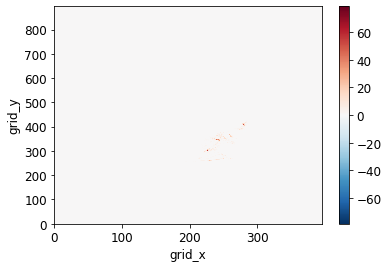

In [46]:
SumTimeIntervals = (
    SurfaceOut['SurfaceVolume_SumSum_24h']+\
    SurfaceOut['SurfaceVolume_SumSum_24h_to_72h']+\
    SurfaceOut['SurfaceVolume_SumSum_72h_to_168h'] 
)
SumDiff = SumTimeIntervals-SurfaceOut['SurfaceVolume_SumSum']
SumDiff.plot.pcolormesh()

In [47]:
SumDiff.sum().values.item()

9515.999900000012

###  Not a non-zero difference = go fish! 

In [58]:
for idx in vol3d[oil]:
    spill_start = vol3d[oil][idx].time[0] 
    spill_end = vol3d[oil][idx].time[-1]
    # define time thresholds
    one_day=numpy.timedelta64(24,'h')
    three_days=numpy.timedelta64(48,'h')
    seven_days=numpy.timedelta64(168,'h')
    # Select surface volume, concentration and dissolution
    vol3d_orig=vol3d[oil][idx]
    # Sum volume over time where volume is greater than threshold
    vol3d_sumt = vol3d_orig.where(vol3d_orig>sfc_vol_threshold).sum(
            dim="time",skipna=True)
    # 3d volume above threshold limits
    vol3dthresh = vol3d_orig.where(vol3d_orig>sfc_vol_threshold)
    #~~~ Without log transforme ~~~ 
    MOHID_In.SurfacePresence[idx,:,:]=(
        vol3d_orig.max(dim='time',skipna=True)>sfc_vol_threshold
    ).astype(int)
    MOHID_In.SurfacePresence_24h[idx,:,:]=(
        vol3d_orig.max(dim='time',skipna=True)>sfc_vol_threshold
        ).where(numpy.logical_and(
            oilArrTime[oil][idx]>=spill_start,
            oilArrTime[oil][idx]<spill_start+one_day),
            False
    ).astype(int)
    MOHID_In.SurfacePresence_24h_to_72h[idx,:,:]=(
        vol3d_orig.max(dim='time',skipna=True)>sfc_vol_threshold
        ).where(numpy.logical_and(
            oilArrTime[oil][idx]>=spill_start+one_day,
            oilArrTime[oil][idx]<spill_start+three_days),
            False
    ).astype(int)
    MOHID_In.SurfacePresence_72h_to_168h[idx,:,:]=(
        vol3d_orig.max(dim='time',skipna=True)>sfc_vol_threshold
        ).where(numpy.logical_and(
            oilArrTime[oil][idx]>=spill_start+three_days,
            oilArrTime[oil][idx]<spill_start+seven_days),
            False
    ).astype(int)
    MOHID_In.SurfaceVolumeSum[idx,:,:]=vol3d_sumt
    MOHID_In.SurfaceVolumeSum_24h[idx,:,:]=vol3dthresh.where(
        numpy.logical_and(
            oilArrTime[oil][idx]>=spill_start,
            oilArrTime[oil][idx]<spill_start+one_day),
            False
        ).sum(dim="time",skipna=True)
    MOHID_In.SurfaceVolumeSum_24h_to_72h[idx,:,:]=vol3dthresh.where(
        numpy.logical_and(
            oilArrTime[oil][idx]>=spill_start+one_day,
            oilArrTime[oil][idx]<spill_start+three_days),
            False
        ).sum(dim="time",skipna=True)
    MOHID_In.SurfaceVolumeSum_72h_to_168h[idx,:,:]=vol3dthresh.where(
        numpy.logical_and(
            oilArrTime[oil][idx]>=spill_start+three_days,
            oilArrTime[oil][idx]<spill_start+seven_days),
            False
        ).sum(dim="time",skipna=True)
SurfaceOut = {}
SurfaceOut['SurfacePresence']=MOHID_In.SurfacePresence.sum(dim='nspills') 
SurfaceOut['SurfacePresence_24h']=(
    MOHID_In.SurfacePresence_24h.sum(dim='nspills')
)
SurfaceOut['SurfacePresence_24h_to_72h']=(
    MOHID_In.SurfacePresence_24h_to_72h.sum(dim='nspills')
)
SurfaceOut['SurfacePresence_72h_to_168h']=(
    MOHID_In.SurfacePresence_72h_to_168h.sum(dim='nspills')
) 
SurfaceOut['SurfaceVolume_SumSum']=MOHID_In.SurfaceVolumeSum.sum(
    dim='nspills', skipna=True)    
SurfaceOut['SurfaceVolume_SumSum_24h']=MOHID_In.SurfaceVolumeSum_24h.sum(
    dim='nspills', skipna=True)
SurfaceOut['SurfaceVolume_SumSum_24h_to_72h']=MOHID_In.SurfaceVolumeSum_24h_to_72h.sum(
    dim='nspills', skipna=True)
SurfaceOut['SurfaceVolume_SumSum_72h_to_168h']=MOHID_In.SurfaceVolumeSum_72h_to_168h.sum(
    dim='nspills', skipna=True)
SurfaceOut['SurfaceVolume_MaxSum']=MOHID_In.SurfaceVolumeMax.sum(
    dim='nspills', skipna=True) 
SurfaceOut['SurfaceVolume_SumSum_ln']=numpy.log(
   MOHID_In.SurfaceVolumeSum.where(MOHID_In.SurfaceVolumeSum>0)
).sum(dim='nspills', skipna=True)
SurfaceOut['SurfaceVolume_SumSum_24h_ln']=numpy.log(
   MOHID_In.SurfaceVolumeSum_24h.where(MOHID_In.SurfaceVolumeSum_24h>0)
).sum(dim='nspills', skipna=True)
SurfaceOut['SurfaceVolume_SumSum_24h_to_72h_ln']=numpy.log(
   MOHID_In.SurfaceVolumeSum_24h_to_72h.where(
       MOHID_In.SurfaceVolumeSum_24h_to_72h>0)
).sum(dim='nspills', skipna=True)
SurfaceOut['SurfaceVolume_SumSum_72h_to_168h_ln']=numpy.log(
   MOHID_In.SurfaceVolumeSum_72h_to_168h.where(
       MOHID_In.SurfaceVolumeSum_72h_to_168h>0)
).sum(dim='nspills', skipna=True)
SurfaceOut['SurfaceVolume_MaxSum_ln']=numpy.log(
    MOHID_In.SurfaceVolumeMax.where(
    MOHID_In.SurfaceVolumeMax>0)).sum(dim='nspills', skipna=True)

In [60]:
SumTimeIntervals = (
    SurfaceOut['SurfacePresence_24h']+\
    SurfaceOut['SurfacePresence_24h_to_72h']+\
    SurfaceOut['SurfacePresence_72h_to_168h'] 
)
SumDiff = SumTimeIntervals-SurfaceOut['SurfacePresence']
SumDiff.sum().values.item()

0

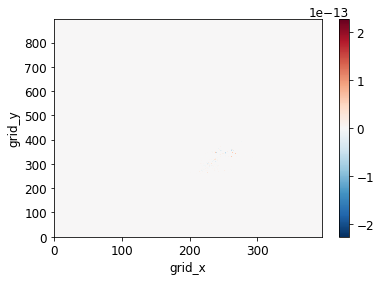

In [56]:
SumTimeIntervals = (
    SurfaceOut['SurfaceVolume_SumSum_24h']+\
    SurfaceOut['SurfaceVolume_SumSum_24h_to_72h']+\
    SurfaceOut['SurfaceVolume_SumSum_72h_to_168h'] 
)
SumDiff = SumTimeIntervals-SurfaceOut['SurfaceVolume_SumSum']
SumDiff.plot.pcolormesh()

In [57]:
SumDiff.sum().values.item()

7.803757640090225e-13

### I can definitely live with that degree of error!  